In [40]:
import json
idols = json.load(open("all_idols_with_bb.json"))

In [90]:
# tweepy 패키지를 불러옵니다.
import tweepy 

# 트위터 Application에서 발급 받은 key 정보들 문자열로 입력

consumer_key = "NOT SHOWN"
consumer_secret = "NOT SHOWN"
access_token = "NOT SHOWN"
access_token_secret = "NOT SHOWN"

# 핸들러를 생성하고 개인정보 인증요청을 합니다.
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# 엑세스 요청
auth.set_access_token(access_token, access_token_secret)

# twitter API 생성
api = tweepy.API(auth, wait_on_rate_limit=True)

In [80]:
import random

## SELECT N posts with images (w. face). 50 posts wihtout images.
selected_posts = [{"with_images": [], "without_images": []} for _ in range(4)]

# Process BTS first.
for idx, idol in enumerate(idols):
    for x in idol:
        elem = idol[x]
        elem['id'] = x

        if not elem['img_link']:
            selected_posts[idx]["without_images"].append(elem)

        elif 'bounding_box' in elem:
            selected_posts[idx]["with_images"].append(elem)
            
quantity = 50

# Let us choose 50 randomly for each.
for x in selected_posts:
    random.shuffle(x["with_images"])
    random.shuffle(x["without_images"])
    
    x["with_images"] = x["with_images"][:quantity]
    x["without_images"] = x["without_images"][:quantity]

In [136]:
replies=[]
name = ["@bts_bighit", "@JYPETWICE", "@weareoneEXO", "@ygofficialblink"]

tweet_id = id
for tweet in tqdm(tweepy.Cursor(api.search_tweets,q='to:'+name, result_type='recent').items(10000)):
    replies.append(tweet)
    
# p(x | y), p(y | x)

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [148]:
# User-level Analyasis

# Recent 10,000.
# Anlalyze the word frequency
# Stopword 빼고, 괜찮은 애들만 모아서 이 post들이 담고 있는 media analysis?
names = ["@bts_bighit", "@JYPETWICE", "@weareoneEXO", "@ygofficialblink"]
all_replies=[]

for name in names:
    temp = []
    for tweet in tqdm(tweepy.Cursor(api.search_tweets,q=f'to: {name} lang:en', result_type='recent').items(5000)):
        temp.append(tweet)
    all_replies.append(temp)

0it [00:00, ?it/s]

Rate limit reached. Sleeping for: 330
Rate limit reached. Sleeping for: 767


0it [00:00, ?it/s]

Rate limit reached. Sleeping for: 769
Rate limit reached. Sleeping for: 764


0it [00:00, ?it/s]

Rate limit reached. Sleeping for: 767
Rate limit reached. Sleeping for: 765


0it [00:00, ?it/s]

Rate limit reached. Sleeping for: 766
Rate limit reached. Sleeping for: 772


In [151]:
import pickle

# with open(file='all_replies.pickle', mode='wb') as f:
#     pickle.dump(all_replies, f)

all_replies_text = [x.text for y in all_replies for x in y]


In [9]:
# READ ALL REPLIES
import pickle

with open(file='all_replies.pickle', mode='rb') as f:
    all_replies = pickle.load(f)

all_replies_text = [x.text for y in all_replies for x in y]

In [156]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words_list = stopwords.words('english')
custom_stopwords = ['http', 'unknwnstatus']

def clean_text(sent):
    words = word_tokenize(sent)
    final_list = [lemmatizer.lemmatize(word) for word in words]
    return [x.lower() for x in final_list if x not in stop_words_list  if len(x) > 3 and x.isalpha() and x.lower() not in custom_stopwords]
    

In [14]:
# All Things Together
all_comments = [ [] for _ in range(4)]


for idx, replies in enumerate(all_replies):
    all_text = [x.text for x in replies]
    
    for comment in all_text:
        all_comments[idx].extend(clean_text(comment))

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

tags = Counter(all_comments[3]).most_common(50)
wc = WordCloud(background_color="white", max_font_size=50)
cloud = wc.generate_from_frequencies(dict(tags))

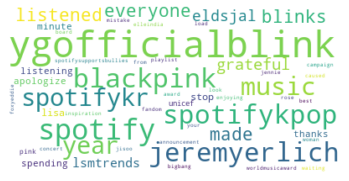

In [17]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [3]:
# !wget https://raw.githubusercontent.com/shekhargulati/sentiment-analysis-python/master/opinion-lexicon-English/positive-words.txt
s = open('positive-words.txt', 'r').readlines()[36:]
positive_words = [x.strip() for x in s]

In [114]:
## BTS WORD FREQUENCY
is_positive_words = {k:v for k,v in dict(Counter(all_comments[1])).items() if k in positive_words}

In [115]:
sorted([(k,v) for k,v in is_positive_words.items()], key=lambda x: -1*x[1])

[('safe', 154),
 ('happy', 148),
 ('good', 126),
 ('healthy', 119),
 ('best', 82),
 ('thank', 70),
 ('great', 67),
 ('love', 65),
 ('winner', 57),
 ('better', 50),
 ('happiness', 49),
 ('pretty', 49),
 ('well', 25),
 ('beautiful', 19),
 ('amazing', 19),
 ('smile', 19),
 ('right', 18),
 ('enjoy', 15),
 ('kindly', 13),
 ('precious', 13),
 ('like', 11),
 ('loved', 10),
 ('glad', 10),
 ('admire', 10),
 ('inspire', 10),
 ('inspiration', 10),
 ('dedicated', 9),
 ('grateful', 8),
 ('peace', 7),
 ('loving', 7),
 ('congratulations', 6),
 ('fancy', 5),
 ('calm', 4),
 ('angel', 4),
 ('encouraging', 4),
 ('winning', 4),
 ('appreciates', 3),
 ('gold', 3),
 ('awards', 3),
 ('proud', 2),
 ('talent', 2),
 ('enough', 2),
 ('achievement', 2),
 ('warmth', 1),
 ('supporting', 1),
 ('congratulation', 1),
 ('surpass', 1),
 ('free', 1),
 ('favor', 1),
 ('favorite', 1),
 ('loyal', 1),
 ('support', 1),
 ('respect', 1),
 ('greatest', 1),
 ('work', 1),
 ('award', 1),
 ('powerful', 1),
 ('dominated', 1),
 ('succe

In [125]:
c = Counter(all_comments[1]).most_common(12) + [(x, is_positive_words[x]) for x in ['love', 'pretty', 'beautiful', 'amazing',]]


In [135]:
c = [x for x in c if 'twice' not in x[0] and x[0] not in ['subjectkpop', '트와이스']]

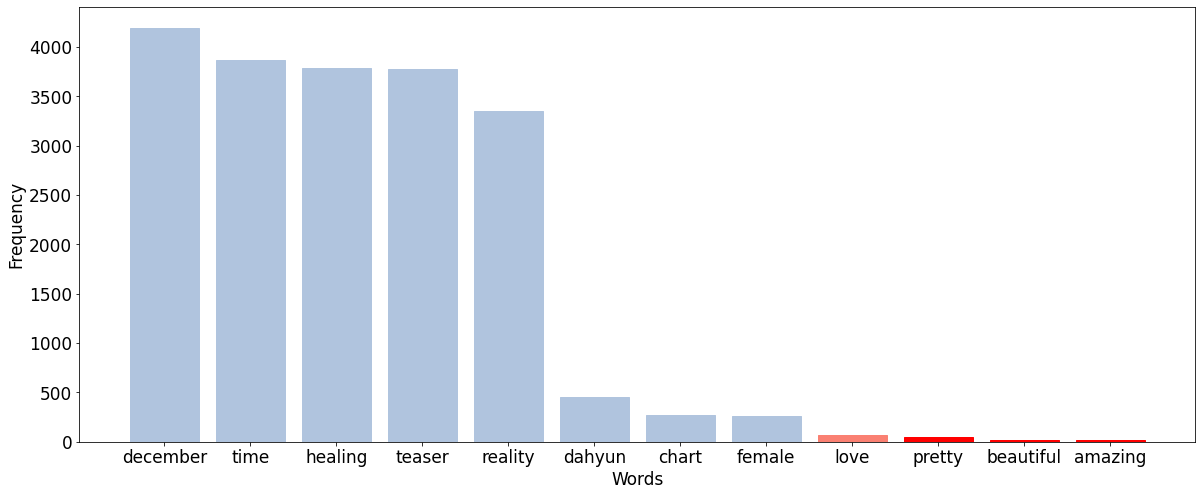

In [137]:
import collections
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.xlabel("Words")
plt.ylabel("Frequency")

barlist = plt.bar([x[0] for x in c], [x[1] for x in c])


for idx in range(len(barlist)):
    barlist[idx].set_color('lightsteelblue')

    
for idx in [8]:
    barlist[idx].set_color('salmon')
    
for idx in [10, 11, 9]:
    barlist[idx].set_color('red')

In [132]:
set([x.text for x in reply])

NameError: name 'reply' is not defined

In [372]:
# Among these tweets let us analyze which have...

# Images reply with Images? Propogation of Visual Roles in SNS?
# Comments to Posts w. Images vs Comments to Posts w/o Images
a = 0
for reply in all_replies:
    a = 0
    for x in reply:
        print(x._json['entities'])
        input()
    break

{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'unknwnstatus', 'name': '𝗟❍❍𝗰𝗵', 'id': 1147909784, 'id_str': '1147909784', 'indices': [3, 16]}, {'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [22, 33]}], 'urls': []}

{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [0, 11]}], 'urls': []}

{'hashtags': [{'text': 'RM', 'indices': [48, 51]}, {'text': 'INDIGO', 'indices': [99, 106]}], 'symbols': [], 'user_mentions': [{'screen_name': 'amazonmusic', 'name': 'Amazon Music', 'id': 14740219, 'id_str': '14740219', 'indices': [3, 15]}, {'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [86, 97]}], 'urls': []}

{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SpotifyKpop', 'name': 'Spotify ❤️ K-Pop', 'id': 978459450871697408, 'id_str': '978459


{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'unknwnstatus', 'name': '𝗟❍❍𝗰𝗵', 'id': 1147909784, 'id_str': '1147909784', 'indices': [3, 16]}, {'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [22, 33]}], 'urls': []}

{'hashtags': [{'text': 'RM', 'indices': [48, 51]}, {'text': 'INDIGO', 'indices': [99, 106]}], 'symbols': [], 'user_mentions': [{'screen_name': 'amazonmusic', 'name': 'Amazon Music', 'id': 14740219, 'id_str': '14740219', 'indices': [3, 15]}, {'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [86, 97]}], 'urls': []}

{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Jess_Virgill', 'name': 'FentyCelineLilie', 'id': 1142851045204418560, 'id_str': '1142851045204418560', 'indices': [3, 16]}, {'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [29, 40]}], 'urls': []}

{'hashtag


{'hashtags': [{'text': 'RM', 'indices': [48, 51]}, {'text': 'INDIGO', 'indices': [99, 106]}], 'symbols': [], 'user_mentions': [{'screen_name': 'amazonmusic', 'name': 'Amazon Music', 'id': 14740219, 'id_str': '14740219', 'indices': [3, 15]}, {'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [86, 97]}], 'urls': []}

{'hashtags': [{'text': 'RM', 'indices': [48, 51]}, {'text': 'INDIGO', 'indices': [99, 106]}], 'symbols': [], 'user_mentions': [{'screen_name': 'amazonmusic', 'name': 'Amazon Music', 'id': 14740219, 'id_str': '14740219', 'indices': [3, 15]}, {'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [86, 97]}], 'urls': []}

{'hashtags': [{'text': 'RM', 'indices': [48, 51]}, {'text': 'INDIGO', 'indices': [99, 106]}], 'symbols': [], 'user_mentions': [{'screen_name': 'amazonmusic', 'name': 'Amazon Music', 'id': 14740219, 'id_str': '14740219', 'indices': [3, 15]}, {'screen_nam


{'hashtags': [{'text': 'RM', 'indices': [48, 51]}, {'text': 'INDIGO', 'indices': [99, 106]}], 'symbols': [], 'user_mentions': [{'screen_name': 'amazonmusic', 'name': 'Amazon Music', 'id': 14740219, 'id_str': '14740219', 'indices': [3, 15]}, {'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [86, 97]}], 'urls': []}

{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SpotifyKpop', 'name': 'Spotify ❤️ K-Pop', 'id': 978459450871697408, 'id_str': '978459450871697408', 'indices': [0, 12]}, {'screen_name': 'bts_bighit', 'name': 'BTS_official', 'id': 1409798257, 'id_str': '1409798257', 'indices': [13, 24]}], 'urls': [{'url': 'https://t.co/SMuoKHTwts', 'expanded_url': 'https://twitter.com/i/web/status/1598653089531056129', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}

{'hashtags': [{'text': 'RM', 'indices': [48, 51]}, {'text': 'INDIGO', 'indices': [99, 106]}], 'symbols': [], 'user_mentions': [{'sc

KeyboardInterrupt: Interrupted by user

In [381]:
# LIke, Comment가 잘 안되는 이유?
# follower들은 잘 되니까.

# 인스타그램으로 보기!!!!


# 외모지상주의
# 비디오 썸네일에 얼굴이 나와있으면
# 더 조회수나 이게 더 높은가?

# 유투브에 노래만 나오는?
# 뮤직비디오 vs 그냥 노래
# 노래를 좋아하는지 외모? 외향적인 걸... 선호한다.

# 1.
# 팬이 아닌 사람 vs 팬인 사람.
# Follow안 한 사람 포스트 A를 like  vs 포스트 A를 like하고 Follow한 사람.

# 어떤 post를 올리는지?
# follower들은: fashion, beauty, food?
# x들은: 관심사가 어떤지?


# 2.
# Follower들의 관심사 - beuaty, health?
# Picture Things vs.

# Followers

# 연령과 성별, 관심사
# Age, Demographic => 

# vs. Other celebrities


In [ ]:
# Not directly menteiond or through visual?

In [14]:
# import pandas as pd

# obj = pd.read_pickle(r'all_replies.pickle')
import json

df = json.load(open("all_idols_with_bb.json"))

In [17]:
len(df[0])

2300

In [ ]:
2300, 3250, 3245, 2551